In [429]:
import pandas as pd
import numpy as np

In [430]:
train_input = pd.read_csv("data/train.csv")

In [431]:
test_input = pd.read_csv("data/test.csv")
test_input.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [432]:
train_input.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [444]:
train_input.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Embarked'], dtype='object')

In [406]:
train_input['Title'] = train_input['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
train_input['Title'].unique().tolist()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\2-23\AppData\Local\Temp\ipykernel_2056\3667213615.py:1: SyntaxWarning: invalid escape sequence '\.'
  train_input['Title'] = train_input['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)


['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [407]:
train_input['Title'] = train_input['Title'].replace(['Capt','Col','Major','Dr','Rev'], 'Officer')
train_input['Title'] = train_input['Title'].replace(['Jonkheer','Master'], 'Master')
train_input['Title'] = train_input['Title'].replace(['Don', 'Sir','Lady','Countess'], 'Royalty')
train_input['Title'] = train_input['Title'].replace(['Miss','Mlle'], 'Miss')
train_input['Title'] = train_input['Title'].replace(['Mr'], 'Mr')
train_input['Title'] = train_input['Title'].replace(['Mrs','Ms'], 'Mrs')

train_input['Title'].value_counts()

Title
Mr         517
Miss       184
Mrs        126
Master      41
Officer     18
Royalty      4
Mme          1
Name: count, dtype: int64

In [428]:
import seaborn as sns
import matplotlib.pylab as plt

train['Title'].hist(figsize=(14,14), bins=20)
plt.show()

KeyError: 'Title'

In [408]:
train_X_num = train[['Age', 'Fare']]
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
train_minmax = minmax_scaler.fit_transform(train_X_num)
train_minmax = pd.DataFrame(train_minmax, 
                            index=train_X_num.index, 
                            columns=train_X_num.columns)
train_minmax.head()

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [409]:
train_input['Age'] = train_minmax['Age']

In [410]:
tm = train_input['Age'].mean()
print(tm)

0.3679205534940792


In [411]:
train_input['Age'].fillna(tm, inplace = True)

C:\Users\2-23\AppData\Local\Temp\ipykernel_2056\1755309478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_input['Age'].fillna(tm, inplace = True)


In [412]:
train_input.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [413]:
test_X_num = test_input[['Age', 'Fare']]

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()


test_minmax = minmax_scaler.fit_transform(test_X_num)

test_minmax = pd.DataFrame(test_minmax, 
                            index=test_X_num.index, 
                            columns=test_X_num.columns)

test_minmax.head()

,Age,Fare
0,0.452723,0.015282
1,0.617566,0.013663
2,0.815377,0.018909
3,0.353818,0.016908
4,0.287881,0.023984


In [414]:
test_input['Age'] = test_minmax['Age']

In [389]:
tm = test_input['Age'].mean()
print(tm)

0.39697468497225086


In [415]:
test_input['Age'].fillna(tm, inplace = True)

C:\Users\2-23\AppData\Local\Temp\ipykernel_2056\659775205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_input['Age'].fillna(tm, inplace = True)


In [416]:
train_input = train_input.drop(columns ='Name')

In [417]:
train_input = train_input.drop(columns ='Cabin')

In [418]:
train_input.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,0.271174,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,0.472229,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,0.321438,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,0.434531,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,0.434531,0,0,373450,8.0500,S,Mr


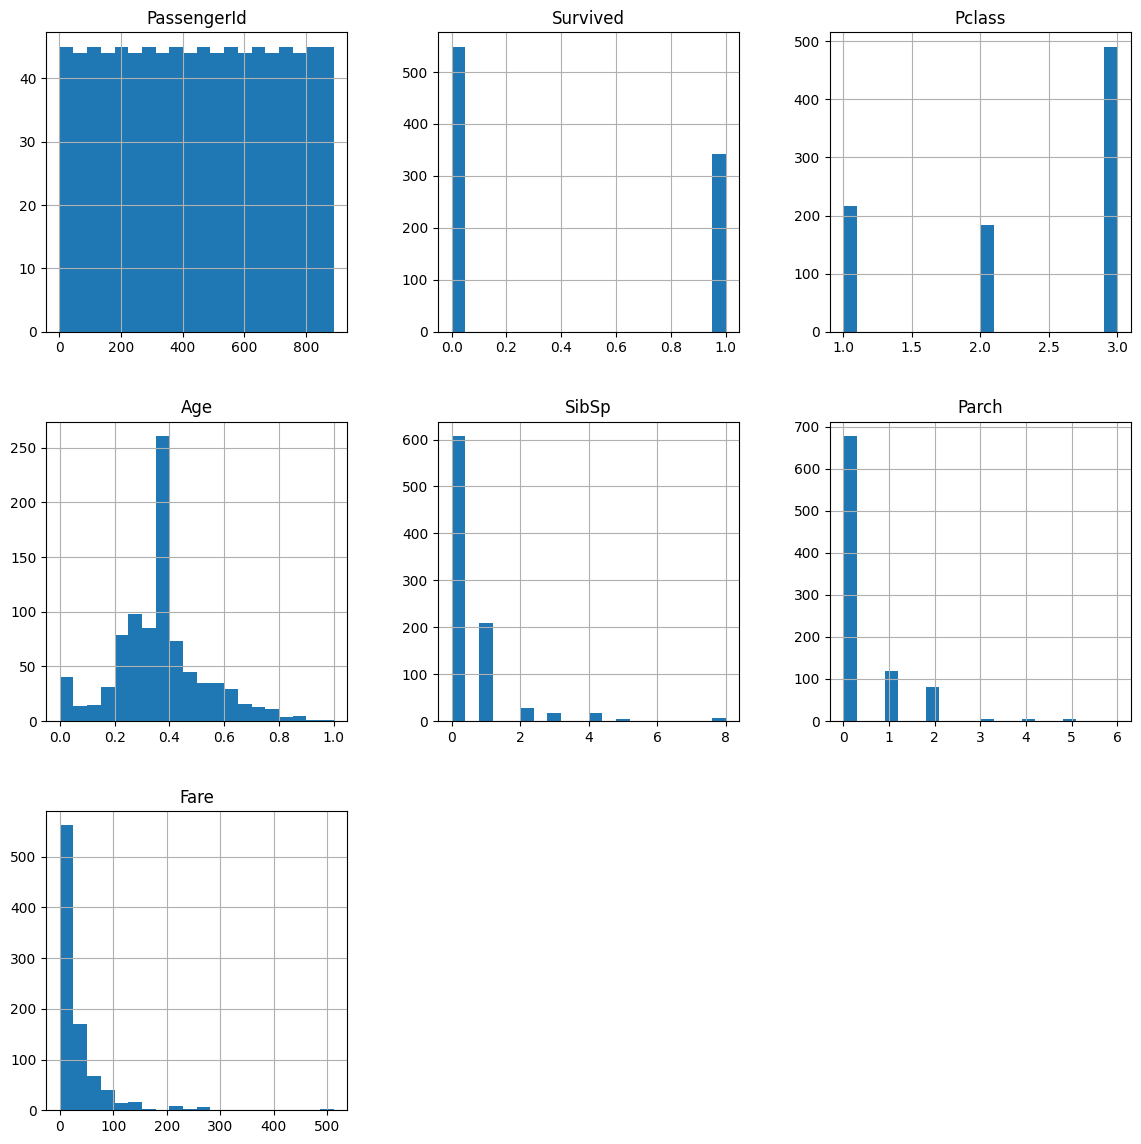

In [419]:
import seaborn as sns
import matplotlib.pylab as plt

train_input.hist(figsize=(14,14), bins=20)
plt.show()

In [425]:
features2 = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Survived']

In [426]:
new_train = train_input[features2]

<Axes: >

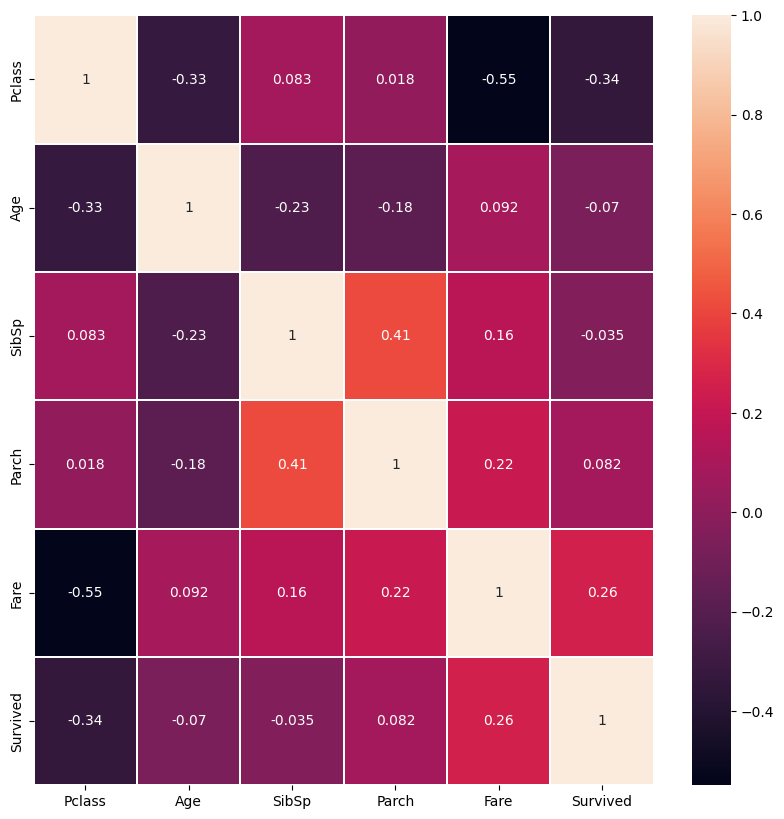

In [427]:
plt.subplots(figsize=(10,10))
sns.heatmap(new_train.corr(), annot=True, linewidths=.2)

In [323]:
train_input.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.367921,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.163383,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.271174,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.367921,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,0.434531,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200


In [324]:
train_input.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [325]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [326]:
train_input = pd.get_dummies(train_input[features])

In [327]:
train_input.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.271174,1,0,7.2500,False,True,False,False,True
1,1,0.472229,1,0,71.2833,True,False,True,False,False
2,3,0.321438,0,0,7.9250,True,False,False,False,True
3,1,0.434531,1,0,53.1000,True,False,False,False,True
4,3,0.434531,0,0,8.0500,False,True,False,False,True


In [328]:
test_input = pd.get_dummies(test_input[features])

In [329]:
train_input.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [330]:
train_target = df['Survived']
train_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [345]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train_input, train_target, test_size = 0.2, random_state =42)

In [346]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [354]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9859402460456942
0.7692307692307693


In [356]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(train_input, train_target)

RandomForestClassifier(max_depth=10, random_state=42)

In [357]:
scores = cross_validate(rfc, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9518989917676441 0.8146262188515709


In [358]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.08548418 0.24513489 0.04927086 0.03631201 0.26099867 0.12163101
 0.16304403 0.01472959 0.00748643 0.01590833]


In [364]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9066013011438967 0.8173643258150299


In [338]:
#scores = cross_validate(rf, train_input[features], train_target[features], return_train_score=True, n_jobs=-1)
#print(np.mean(scores['train_score']), np.mean(scores['test_score']))

In [340]:
predictions = rfc.predict(test_input)

In [365]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [366]:
result = {
    'PassengerId' : test_data['PassengerId'], 
    'Survived':predictions,}
output = pd.DataFrame(result)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [367]:
output.to_csv('my_submission6.csv', index=False)